In [8]:
import gym
import torch.nn as nn
from seagul.rl.algos.sac import sac
from seagul.nn import MLP, CategoricalMLP
import torch
import matplotlib.pyplot as plt
from seagul.rl.models import SACModel
from multiprocessing import Process


# TODO for this to work need to convert from numpy dtype to torch
env_name = "Pendulum-v0"
# env = gym.make(env_name)
# dtype = env.action_space.sample().dtype

torch.set_default_dtype(torch.float32)

input_size = 3
output_size = 1
layer_size = 64
num_layers = 2
activation = nn.ReLU

policy = MLP(input_size, output_size*2, num_layers, layer_size, activation)

# Do I need to do weight sharing here?
value_fn = MLP(input_size, 1, num_layers, layer_size, activation)
q1_fn = MLP(input_size + output_size, 1, num_layers, layer_size, activation)
q2_fn = MLP(input_size + output_size, 1, num_layers, layer_size, activation)

model = SACModel(policy, value_fn, q1_fn, q2_fn, 5)

def run_and_test(arg_dict,seed):
    t_model, rewards, var_dict = ppo("Pendulum-v0", 200*2048, model, seed=seed, **arg_dict)

    if (var_dict['early_stop']):
        print("seed", seed, "achieved 200 reward in ", len(rewards), "steps")
    #        print("Rewards were", rewards)

    else:
        print("Error: seed:" , seed, "failed")
        print("Rewards were", rewards)

    return
    

# Define our hyper parameters
arg_dict = {
    'epoch_batch_size' : 2048,  # how many steps we want to use before we update our gradients
    'replay_batch_size' : 2048,
    'reward_stop' : -200,
    'pol_batch_size' : 512,
    'val_batch_size' : 512,
    'pol_lr' : 1e-2,
    'val_lr' : 1e-2,
}

model, rews, var_dict = sac(env_name, 3e6, model,**arg_dict)
print(rews)

# proc_list = []
# for seed in [0,1,2,3]:
#     p = Process(target=run_and_test, args=(arg_dict, seed))
#     p.start()
#     proc_list.append(p)


# for p in proc_list:
#     print("joining")
#     p.join()

globals().update(var_dict)


  0%|          | 0/3000000.0 [00:00<?, ?it/s]
  0%|          | 2200/3000000.0 [00:03<1:25:31, 584.15it/s]
  0%|          | 4400/3000000.0 [00:05<1:11:38, 696.92it/s]
  0%|          | 6600/3000000.0 [00:07<1:01:56, 805.50it/s]
  0%|          | 8800/3000000.0 [00:08<54:58, 906.71it/s]  
  0%|          | 11000/3000000.0 [00:10<50:33, 985.24it/s]
  0%|          | 13200/3000000.0 [00:12<47:16, 1052.85it/s]
  1%|          | 15400/3000000.0 [00:14<44:50, 1109.19it/s]
  1%|          | 17600/3000000.0 [00:15<43:13, 1150.03it/s]
  1%|          | 19800/3000000.0 [00:17<41:56, 1184.09it/s]
  1%|          | 22000/3000000.0 [00:19<41:09, 1206.15it/s]
  1%|          | 24200/3000000.0 [00:21<40:32, 1223.36it/s]
  1%|          | 26400/3000000.0 [00:22<40:21, 1228.17it/s]
  1%|          | 28600/3000000.0 [00:24<40:02, 1236.64it/s]
  1%|          | 30800/3000000.0 [00:26<39:46, 1244.27it/s]
  1%|          | 33000/3000000.0 [00:28<39:31, 1251.02it/s]
  1%|          | 35200/3000000.0 [00:29<39:18, 1257.03

[tensor(-1200.2374), tensor(-1414.5264), tensor(-1481.9723), tensor(-1390.3817), tensor(-1698.5283), tensor(-1699.2778), tensor(-1141.3745), tensor(-1602.4042), tensor(-1423.1708), tensor(-1279.9369), tensor(-1560.0183), tensor(-1210.7729), tensor(-1371.9949), tensor(-1355.3925), tensor(-1441.3068), tensor(-1334.1606), tensor(-1481.0583), tensor(-1455.9567), tensor(-1458.7755), tensor(-1330.6177), tensor(-1357.6000), tensor(-1363.6493), tensor(-1295.0583), tensor(-1359.6626), tensor(-1283.9122), tensor(-1475.1028), tensor(-1245.6799), tensor(-1504.2195), tensor(-1353.2129), tensor(-1256.6449), tensor(-1264.1564), tensor(-1219.2333), tensor(-1459.7052), tensor(-1355.5948), tensor(-1298.4576), tensor(-1183.3486), tensor(-1365.4409), tensor(-1495.9308), tensor(-1580.9406), tensor(-1507.0123), tensor(-1146.5690), tensor(-1506.3733), tensor(-1523.3867), tensor(-1515.7405), tensor(-1474.7781), tensor(-1335.8564), tensor(-1518.4998), tensor(-1427.0653), tensor(-1618.7262), tensor(-1531.0999),

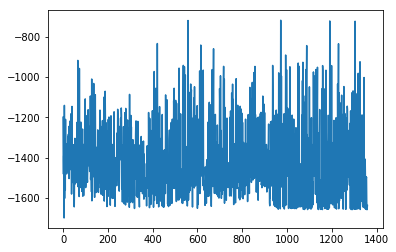

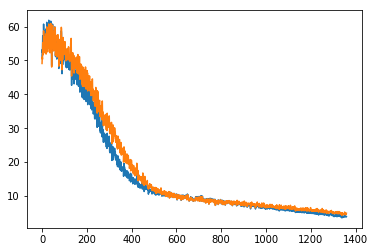

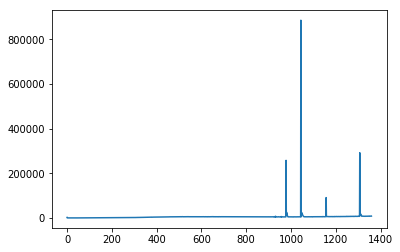

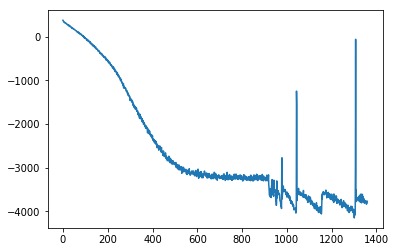


100%|█████████▉| 2992000/3000000.0 [42:59<00:06, 1260.55it/s]

In [9]:
plt.plot(raw_rew_hist)
plt.figure()
plt.plot(q1_loss_hist)
plt.plot(q2_loss_hist)
plt.figure()
plt.plot(val_loss_hist)
plt.figure()
plt.plot(pol_loss_hist)

In [4]:
replay_obs1, replay_obs2, replay_acts, replay_rews, replay_done = replay_buf.sample_batch(replay_batch_size)




In [6]:
replay_buf.sample_batch()

(tensor([[-4.3716e-01, -8.9938e-01,  7.5614e+00],
         [ 2.7981e-01, -9.6005e-01,  6.0122e+00],
         [-6.6774e-01, -7.4439e-01,  1.9993e+00],
         [-6.2529e-01, -7.8039e-01,  1.9571e+00],
         [-8.6751e-01,  4.9742e-01, -9.0973e-02],
         [-8.0000e-01,  6.0000e-01, -1.1238e+00],
         [-9.9995e-01,  1.0270e-02,  1.5052e+00],
         [-9.8631e-01,  1.6490e-01, -6.0215e-01],
         [-9.8900e-01,  1.4789e-01, -1.6301e+00],
         [-9.6875e-01,  2.4805e-01,  2.5050e+00],
         [-4.5598e-01, -8.8999e-01,  1.1645e+00],
         [-4.5555e-01, -8.9021e-01,  3.4157e+00],
         [ 1.9587e-02, -9.9981e-01, -3.7314e-01],
         [-8.8173e-01,  4.7176e-01,  8.0000e+00],
         [-9.9758e-01, -6.9506e-02, -3.5774e+00],
         [-8.1126e-01,  5.8469e-01,  8.0000e+00],
         [-9.9996e-01, -9.4351e-03, -4.3561e+00],
         [-9.9295e-01, -1.1852e-01,  4.8240e+00],
         [-4.8092e-02, -9.9884e-01,  6.7154e+00],
         [-3.1406e-01, -9.4940e-01,  6.5436e+00],
